# **EJERCICIOS DE MANIPULACIÓN DE DATOS CON PANDAS III (VISUALIZACIÓN)**

## **Introducción**
Los aguacates son cada vez más populares, especialmente por su uso en el guacamole y en las tostadas. La Junta del Aguacate Hass hace un seguimiento de la oferta y la demanda de aguacates en EE.UU., incluyendo las ventas de tres tamaños diferentes de aguacate. En este ejercicio, utilizarás un diagrama de barras para averiguar qué tamaño es el más popular.

![](images/avocados.png)

## **Ejercicio 1**
Los gráficos de barras son estupendos para revelar las relaciones entre variables categóricas (tamaño) y numéricas (número de ventas), pero a menudo tendrás que manipular primero tus datos para obtener los números que necesitas para el gráfico.

1. Explora los datos recopilados por la Junta del Aguacate Hass (fichero `data/avocados_data.csv`) y vuélcalos a un dataframe de nombre `avocados`.
2. Imprime las primeras filas del dataframe `avocados`. ¿Qué columnas están disponibles?
3. Para cada grupo de tamaños de aguacates, calcula el número total vendido, almacenándolo como `nb_sold_by_size`.
4. Crea un gráfico de barras del número de aguacates vendidos por tamaño.
5. muestra el gráfico por pantalla.

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56
                  nb_sold
size                     
extra_large  1.561752e+08
large        2.015012e+09
small        2.054936e+09


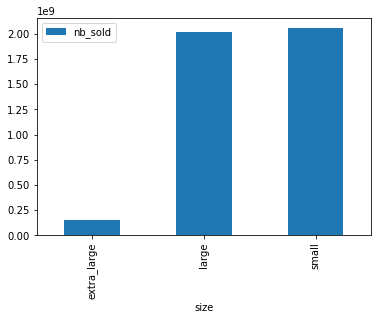

In [31]:
# Importa matplotlib.pyplot con el alias plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importa los datos de aguacates en un dataframe
avocados = pd.read_pickle('data/avocados_data.pkl')

# Muestra las primeras filas de datos
print(avocados.head())

# Obtén el número total de aguacates vendidos de cada tamaño
nb_sold_by_size = avocados.pivot_table(values='nb_sold', index='size', aggfunc=sum)
print(nb_sold_by_size)

# Crea un gráfico de barras del número de aguacates vendidos por tamaño
nb_sold_by_size.plot(kind='bar', y='nb_sold')

# Muestra el gráfico
plt.show()

## **Ejercicio 2**
Los gráficos de líneas están diseñados para visualizar la relación entre dos variables numéricas, donde cada valor de los datos está conectado con el siguiente. Son especialmente útiles para visualizar el cambio de un número a lo largo del tiempo, ya que cada punto de tiempo está conectado de forma natural con el siguiente. En este ejercicio, visualizarás el cambio en las ventas de aguacates a lo largo de tres años.

### **Instrucciones**
1. Obtén el número total de aguacates vendidos en cada fecha. El dataframe tiene dos filas para cada fecha: una para los ecológicos y otra para los convencionales. Guárdalo como `nb_sold_by_date`.
2. Crea un gráfico de líneas del número de aguacates vendidos.
3. Muestra el gráfico.

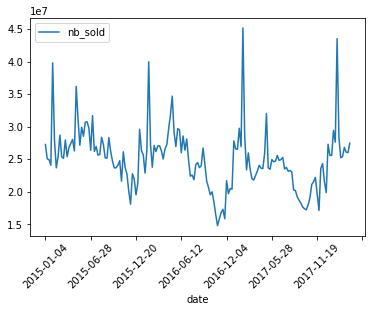

In [32]:
### Importar matplotlib.pyplot con el alias plt
import matplotlib.pyplot as plt
import numpy as np

# Obtén el número total de aguacates vendidos en cada fecha
nb_sold_by_date = avocados.pivot_table(values='nb_sold', index='date', aggfunc=np.sum)

# Crea un gráfico de líneas del número de aguacates vendidos por fecha
nb_sold_by_date.plot(rot=45)

# Muestra el gráfico
plt.show()


## **Ejercicio 3**
Los gráficos de dispersión son ideales para visualizar las relaciones entre variables numéricas. En este ejercicio, compararás el número de aguacates vendidos con el precio medio y verás si están relacionados. Si están relacionados, podrás utilizar un número para predecir el otro.

### **Instrucciones**
1. Crea un gráfico de dispersión con `nb_sold` en el eje x y `avg_price` en el eje y. Titúlalo `"Número de aguacates vendidos frente al precio medio"`.
2. Muestra el gráfico.

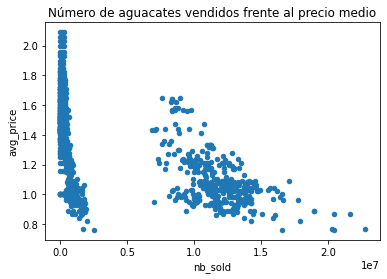

In [33]:
# Gráfico de dispersión de avg_price vs. nb_sold con título
avocados.plot(kind='scatter', y='avg_price', x='nb_sold', title = "Número de aguacates vendidos frente al precio medio")

# Mostrar el gráfico
plt.show()

## **Ejercicio 4**
La creación de múltiples gráficos para diferentes subconjuntos de datos te permite comparar grupos. En este ejercicio, crearás múltiples histogramas para comparar los precios de los aguacates convencionales y ecológicos.

### **Instrucciones**
1. Crea un subconjunto de aguacates para el tipo convencional (`conventional`) y la columna del precio medio (`avg_price`). Crea un histograma.
2. Crea un histograma con el precio medio `avg_price` para los aguacates de tipo ecológico (`organic`).
3. Añade una leyenda a tu gráfico, con los nombres `"convencional"` y `"ecológico"`.
4. Muestra tu gráfico.

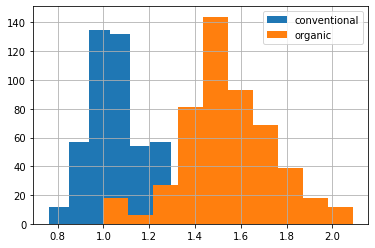

In [34]:
# Histograma del precio medio de aguacate convencional 
avocados[avocados['type'] == "conventional"]['avg_price'].hist()

# Histograma del precio medio de aguacate ecológico
avocados[avocados['type'] == "organic"]['avg_price'].hist()

# Añade una leyenda
plt.legend(['conventional', 'organic'])

# Muestra el gráfico
plt.show()

## **Ejercicio 5**
1. Modifica tu código para ajustar la transparencia de ambos histogramas a 0,5 para ver cuánto se solapa entre las dos distribuciones.
2. Modifica tu código para utilizar 20 bins en ambos histogramas.



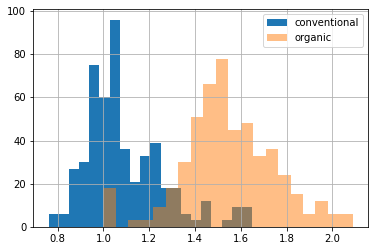

In [43]:
# Histograma del precio medio de aguacate convencional 
avocados[avocados['type'] == "conventional"]['avg_price'].hist(alpha=1, bins=20)

# Histograma del precio medio de aguacate ecológico
avocados[avocados['type'] == "organic"]['avg_price'].hist(alpha=0.5, bins=20)

# Añade una leyenda
plt.legend(['conventional', 'organic'])

# Muestra el gráfico
plt.show()

## **Ejercicio 6**
Los valores erróneos están por todas partes, y no quieres que interfieran en tu trabajo. Algunas funciones ignoran los datos que faltan por defecto, pero ese no es siempre el comportamiento que deseas. Algunas funciones no pueden manejar los valores nulos, por lo que hay que ocuparse de estos valores antes de poder utilizarlos. Si no sabes dónde están tus valores nulos, o si existen, podrías cometer errores en tu análisis. En este ejercicio, determinarás si hay valores nulos en el conjunto de datos, y si es así, cuántos.

### **Instrucciones**
0. Crea un dataframe llamado `avocados_2016` que contenga solo los datos de 2016 de `avocados`.
1. Imprime un dataframe que muestre si falta algún valor en `avocados_2016`.
2. Imprime un resumen que muestre si falta algún valor de cada columna o no.
3. Crea un gráfico de barras con el número total de valores que faltan en cada columna.

      date   type   year  avg_price   size  nb_sold
52   False  False  False      False  False    False
53   False  False  False      False  False    False
54   False  False  False      False  False    False
55   False  False  False      False  False    False
56   False  False  False      False  False    False
..     ...    ...    ...        ...    ...      ...
944  False  False  False      False  False    False
945  False  False  False      False  False    False
946  False  False  False      False  False    False
947  False  False  False      False  False    False
948  False  False  False      False  False    False

[312 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


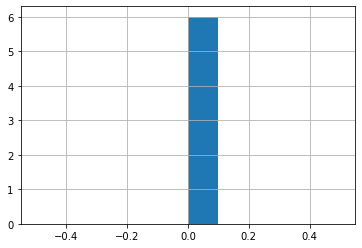

In [36]:
# Importar matplotlib.pyplot con el alias plt
import matplotlib.pyplot as plt

avocados_2016 = avocados.query('year == 2016')[:].copy()

# Comprueba todos los valores del dataframe en busca de valores nulos
print(avocados_2016.isna())

# Comprueba si hay valores nulos en cada columna
print(avocados_2016.isna().any())

# Diagrama de barras de los valores nulos por variable
avocados_2016.isna().sum().hist()

# Mostrar el gráfico
plt.show()

## **Ejercicio 7**
Ahora que sabes que hay algunos valores erróneos en tu dataframe, tienes algunas opciones para tratarlos. Una forma es eliminarlos completamente del conjunto de datos. En este ejercicio, eliminarás los valores erróneos eliminando todas las filas que contienen valores nulos.

### **Instrucciones**
1. Elimina las filas de aguacates_2016 que contengan valores perdidos y guarda las filas restantes en `avocados_complete`.
2. Comprueba que todos los valores que faltan se han eliminado de `avocados_complete`. Imprime si hay algún NaN en cada columna.

In [37]:
# Elimina las filas con valores nulos
avocados_complete = avocados_2016.dropna()

# Comprueba si alguna columna contiene valores nulos
print(avocados_complete.isna().sum())

date         0
type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64


## **Ejercicio 8**
Otra forma de tratar los valores nulos es sustituirlos todos por el mismo valor. En el caso de las variables numéricas, una opción es sustituir los valores por 0, lo que harás aquí. Sin embargo, cuando sustituyes los valores nulos, haces suposiciones sobre lo que significa un valor nulos. En este caso, supondrás que la falta de un número de ventas significa que esa semana no se vendió ese tipo de aguacate.

En este ejercicio, verás cómo la sustitución de los valores perdidos puede afectar a la distribución de una variable con histogramas. Puedes trazar histogramas para varias variables a la vez de la siguiente manera:

```Python
perros[["altura_cm", "peso_kg"]].hist()
```

### **Instrucciones**
1. Se ha creado una lista, `cols_with_missing`, que contiene los nombres de las columnas con valores perdidos: `"small_sold"`, `"large_sold"` y `"xl_sold"`.
2. Crea un histograma de esas columnas.
3. Muestra el gráfico.

4. Sustituye los valores nulos de `avocados_2016` por 0s y guarda el resultado como `avocados_filled`.
5. Crea un histograma de las columnas `cols_with_missing` de avocados_llenados.




In [38]:
# Lista de columnas con valores nulos
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Crea histogramas que muestren las distribuciones cols_with_missing
avocados_2016[cols_with_missing].plot(kind='bar')

# Muestra el gráfico
plt.show()

# Rellena los valores que faltan con 0
avocados_filled = avocados_2016[cols_with_missing].fillna(0)

# Crea histogramas de las columnas rellenas
avocados_filled.hist()

# Muestra el gráfico
plt.show()

KeyError: "None of [Index(['small_sold', 'large_sold', 'xl_sold'], dtype='object')] are in the [columns]"

### **Ejercicio 9**
Recientemente has obtenido nuevos datos de aguacates de 2019 que te gustaría poner en un dataframe utilizando el método de la lista de diccionarios. Recuerda que con este método, recorres los datos fila a fila.
```
date           small_sold       large_sold
"2019-11-03"    10376832         7835071
"2019-11-10"    10717154         8561348
```

### **Instrucciones**
1. Crea una lista de diccionarios con los nuevos datos llamada `avocados_list`.
2. Convierte la lista en un dataframe llamado `avocados_2019`.
3. Imprime tu nuevo dataframe.


In [39]:
# Crear una lista de diccionarios con nuevos datos
avocados_list = [
    {'date': '2019-11-03', 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': '2019-11-10', 'small_sold': 10717154, 'large_sold': 8561348},
 ]

# Convierte la lista en DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Imprime el nuevo DataFrame
avocados_2019.head()

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


### **Ejercicio 10**
¡Acaban de llegar más datos! Esta vez, utilizarás el método del diccionario de listas, analizando los datos columna por columna.
```
date           small_sold       large_sold
"2019-11-17"    10859987          7674135
"2019-12-01" 	 9291631          6238096
```

### **Instrucciones**
1. Crea un diccionario de listas con los nuevos datos llamado `avocados_dict`.
2. Convierte el diccionario en un dataframe llamado `avocados_2019`.
3. Imprime tu nuevo dataframe.

In [45]:
# Crea un diccionario de listas con nuevos datos
avocados_dict = {
  "date": ['2019-11-17', '2019-12-01'],
  "small_sold": [10, 20],
  "large_sold": [15, 11]
}

# Convierte el diccionario en DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Imprime el nuevo DataFrame
avocados_2019.head()

,date,small_sold,large_sold
0,2019-11-17,10,15
1,2019-12-01,20,11


### **Ejercicio 11**
¡Ya casi lo tienes! Para facilitar la lectura, tendrás que ordenar los datos y exportarlos a CSV para que tus compañeros puedan leerlos.

### **Instrucciones**
1. Guarda el `avocados_2019` ordenado como un CSV llamado `"avocados_2019_sorted.csv"`.

In [42]:
avocados_2019.sort_values(by='date').to_csv('avocados_2019_sorted.csv')